# Prosper Loan Data Exploration
## by Artyom Chernyaev

## Preliminary Wrangling

> This data set contains information on peer to peer loans facilitated by credit company Prosper

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Let's load data set and do some initial wrangling:

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
85224,A0CB35956841213705C3364,1028987,2013-11-23 11:57:38.063000000,NaN,60,Current,NaN,0.20040,0.1765,0.1665,...,-19.74,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,3
1759,7B253536120590660B5A354,549267,2012-01-05 16:48:28.603000000,NaN,36,Chargedoff,2012-09-08 00:00:00,0.34577,0.3058,0.2958,...,-9.80,0.0,3786.38,3786.38,0.0,1.0000,0,0,0.0,8
67362,04E4351403325983400B487,505440,2011-05-05 16:22:31.667000000,NaN,36,Completed,2012-05-09 00:00:00,0.32576,0.2899,0.2799,...,-62.95,0.0,0.00,0.00,0.0,0.9669,0,0,0.0,119
47552,5216355960516603999914D,646576,2012-09-26 16:50:27.570000000,NaN,60,Current,NaN,0.24682,0.2218,0.2118,...,-195.60,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,67
21001,478233712116427681DCDF8,47575,2006-10-12 12:09:26.230000000,HR,36,Defaulted,2007-06-20 00:00:00,0.29776,0.2900,0.2850,...,-1.48,-37.5,2882.73,2882.73,0.0,1.0000,0,0,0.0,19


Note that this data set contains 81 columns. For the purpose of this analysis let's take only some of them:

In [5]:
target_columns =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [6]:
target_df = df[target_columns]

In [7]:
target_df.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
97605,36,Completed,0.2400,NaN,0,Full-time,1.0,8333.333333,NaN,3000,2007-11-21 00:00:00,0,48
15303,36,Current,0.3099,E,2,Employed,0.0,4899.750000,1.0,3500,2011-08-30 00:00:00,0,16
27084,36,Chargedoff,0.2699,D,2,Employed,16.0,4416.666667,NaN,6500,2011-09-22 00:00:00,0,24
91523,36,Completed,0.1360,NaN,3,Full-time,4.0,7083.333333,1.0,17000,2008-05-27 00:00:00,0,401
13479,60,Current,0.0766,AA,3,Employed,0.0,2500.000000,2.0,4000,2013-10-16 00:00:00,0,77


In [8]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
DelinquenciesLast7Years      112947 non-null float64
StatedMonthlyIncome          113937 non-null float64
TotalProsperLoans            22085 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
Recommendations              113937 non-null int64
Investors                    113937 non-null int64
dtypes: float64(4), int64(5), object(4)
memory usage: 11.3+ MB


Since Prosper use their propriatery Prosper Rating only since 2009, we have a lot of missing values in ProsperRating column. Let's drop these missing values:

In [9]:
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

Convert LoanOriginationDate to datetime datatype.

In [10]:
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])

In [11]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
index                        84853 non-null int64
Term                         84853 non-null int64
LoanStatus                   84853 non-null object
BorrowerRate                 84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    84853 non-null int64
EmploymentStatus             84853 non-null object
DelinquenciesLast7Years      84853 non-null float64
StatedMonthlyIncome          84853 non-null float64
TotalProsperLoans            19797 non-null float64
LoanOriginalAmount           84853 non-null int64
LoanOriginationDate          84853 non-null datetime64[ns]
Recommendations              84853 non-null int64
Investors                    84853 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 9.1+ MB


According to [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) in case of no previous credit history on Prosper the value for column TotalProsperLoans will be NaN, let's replace it with 0.

In [12]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)

In [13]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
index                        84853 non-null int64
Term                         84853 non-null int64
LoanStatus                   84853 non-null object
BorrowerRate                 84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    84853 non-null int64
EmploymentStatus             84853 non-null object
DelinquenciesLast7Years      84853 non-null float64
StatedMonthlyIncome          84853 non-null float64
TotalProsperLoans            84853 non-null float64
LoanOriginalAmount           84853 non-null int64
LoanOriginationDate          84853 non-null datetime64[ns]
Recommendations              84853 non-null int64
Investors                    84853 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 9.1+ MB


### What is the structure of your dataset?

> There are 84853 listings for loans in peer-to-peer credit company Prosper. Original data set has 81 variables i selected 13 from them. They are LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors. Most of the variables are numeric however there is some exceptions:
<ul>
    <li>LoanStatus - categorical variable</li>
    <li>ProsperRating (Aplha) ordinal categorical variable with the following values from higher to lower ('AA', 'A', 'B', 'C', 'D', 'E', 'HR')</li>
    <li>EmploymentStatus - categorical variable</li>
    <li>LoanOriginationDate - timestamp</li>
</ul>

### What is/are the main feature(s) of interest in your dataset?

> I will try to figure out what features can be used to predict default on credit. Also i would like to check what are major factors connected with prosper credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the borrowers Prosper rating will have the highest impact on chances of default. Also I expect that stated monthly income, number of delinquencies variables will play a major role.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [14]:
default_color = sb.color_palette()[0]

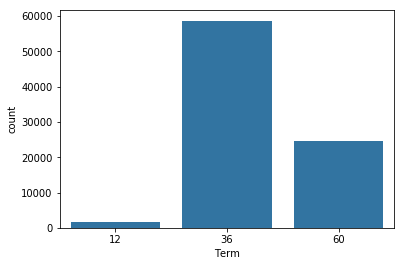

In [15]:
sb.countplot(data = target_df, x = 'Term', color = default_color)

For loan terms there are three options: 36, 60 and 12. Most common is 36 months. Next, Loan status.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

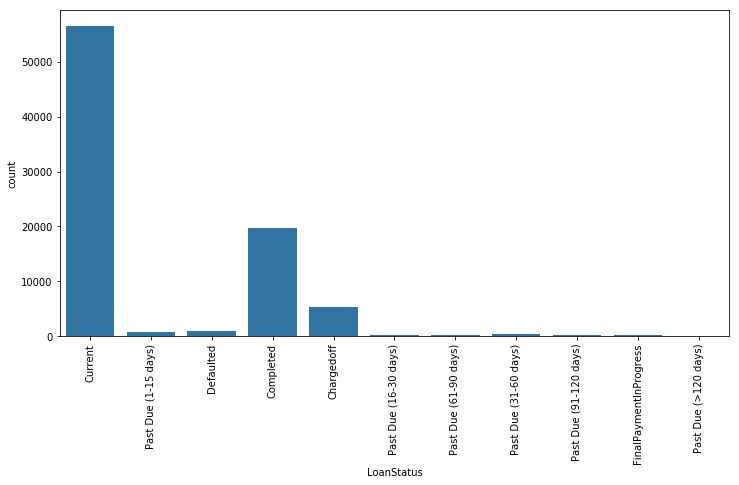

In [16]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=90)
sb.countplot(data = target_df, x = 'LoanStatus', color = default_color)

Most of the loans in the data set are actually current loans. Other big part is completed loans, defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount. Past due loans are split in several groups based on the length of payment delay. Up next - Borrower Rate.

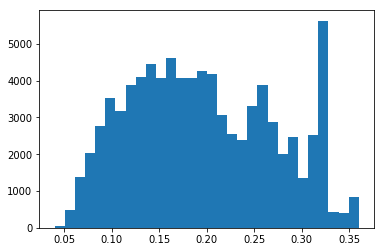

In [17]:
plt.hist(data=target_df, x='BorrowerRate', bins=30);

The distribution of the borrower rate apears to be bimodal with first peak around 0.16, larger peak (true mode) around 0.32. Let's check number of occurences:

In [18]:
target_df.BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3199    1645
Name: BorrowerRate, dtype: int64

Turns out two most common rates are 0.3177 and 0.3199. Let's check Prosper Rating next.

Because Prosper Rating is ordinal categorial type in nature (From the highest rating A to the lowest HR) We need to convert it using pandas:

In [19]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']


ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_list)
target_df['ProsperRating (Alpha)'] = target_df['ProsperRating (Alpha)'].astype(ordered_var)

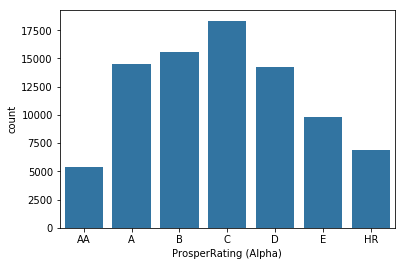

In [20]:
sb.countplot(data=target_df, x='ProsperRating (Alpha)', color=default_color)

Interestingly enough ratings are almost normaly distrubuted with the highest AA rating and the lowest rating HR are the least common and average rating C being the most common. Now let's see about purpose of the loan.

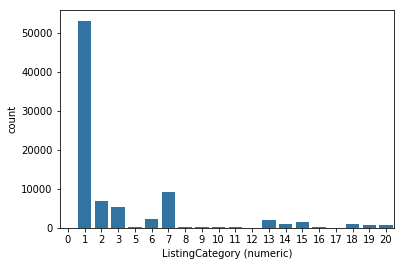

In [21]:
sb.countplot(data=target_df, x='ListingCategory (numeric)', color=default_color)

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

The overwhelming majority of loans are used for debt consolidation. Other notable categories include Other, Home Improvement and Business. Next variable - Employment Status.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

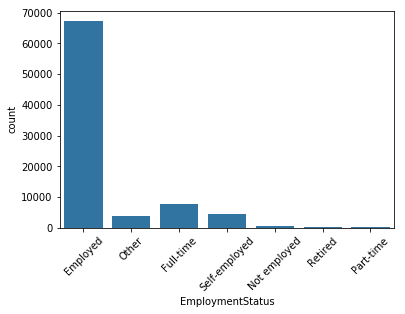

In [22]:
sb.countplot(data=target_df, x='EmploymentStatus', color=default_color)
plt.xticks(rotation=45)

The majority of borrowers are employed, all other categories constitute only small part of borrowers. Let's move to the DelinquenciesLast7Years variable.

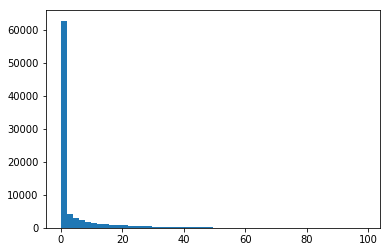

In [23]:
plt.hist(data=target_df, x='DelinquenciesLast7Years', bins=50);

Most of the Prosper clients has 0 delinquencies for the last 7 years, a small minority has up to 20 delinquencies and very tiny group had more than 20 but less than 100 delunquencies. Next let's see at StatedMonthlyIncome.

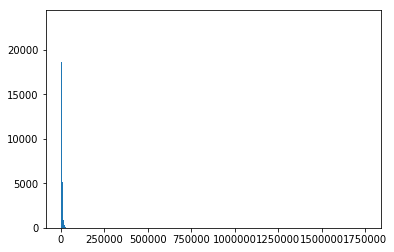

In [24]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);

Distribution of stated montly income is higly skewed to the right. Let's check how many outliers we have:

In [25]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(target_df[target_df['StatedMonthlyIncome'] >= boundary])

245

Let's check montly income a little bit closer:

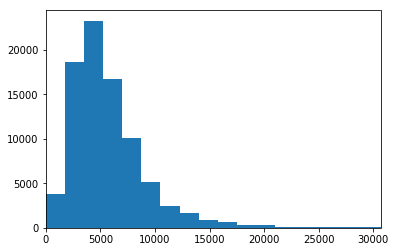

In [26]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);

With a boundary of mean + three standard deviations distribution of montly income looks aproxamitly normal with noticeable right skew. Next step - TotalProsperLoans

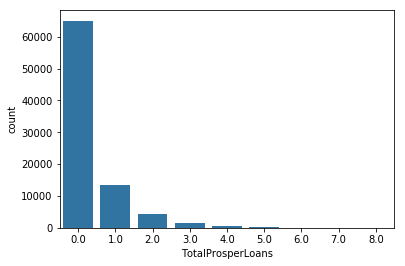

In [27]:
sb.countplot(data=target_df, x='TotalProsperLoans', color=default_color);

For the most clients this is their first loan at prosper, small minority of clients already borrowed 1, 2 or 3 loans, the maximum is 8 loans. Next step - LoanOriginalAmount

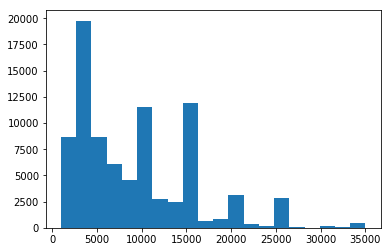

In [28]:
plt.hist(data=target_df, x='LoanOriginalAmount', bins=20);

It looks like most of the loans are below 15 thousand range and people often borrow in increments of 5 thousands i.e. 5000, 10000, 15000, 20000 etc. Let's move on to LoanOriginationDate

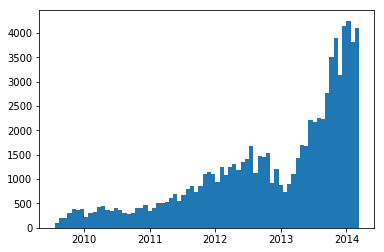

In [29]:
plt.hist(data=target_df, x='LoanOriginationDate', bins=72);

In [30]:
target_df['LoanOriginationDate'].describe()

count                   84853
unique                   1165
top       2014-01-22 00:00:00
freq                      491
first     2009-07-20 00:00:00
last      2014-03-12 00:00:00
Name: LoanOriginationDate, dtype: object

Data points are form 20.07.2009 till 12.03.2014. We can clearly see a substansial growth for number of loans from the start of 2013. Next item - Recommendations.

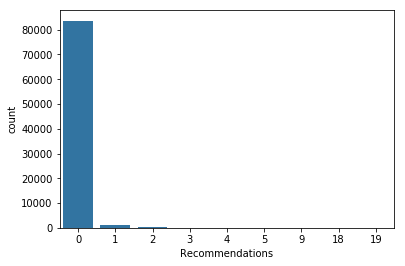

In [31]:
sb.countplot(data=target_df, x='Recommendations', color=default_color);

Overwhelming majority of loans obtained without recomendations. Next let's dig into InvestmentFromFriendsAmount

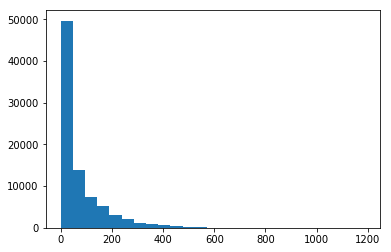

In [32]:
plt.hist(data=target_df, x='Investors', bins=25);

Most loans have only one investor and majority less than 200 investors but some outliers have about 1200 inverstors.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Prosper ratings are almost normally distributed. Distribution of monthly stated income is very awkward: with a lot of outliers and very large range of values, because this is evidently based on borrowers self-reporting i think there is a lot of wrong values, we will wrangle with it bellow.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans (loans with specified past due period) also chargedoff loans can be considered as defaulted. We will transform data as next step:

In [33]:
target_df['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [34]:
# leaving only completed chargedoff or defaulted listings
condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') | (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

In [35]:
# setting chargedoff as defaulted
def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']

In [36]:
target_df['LoanStatus'] = target_df.apply(change_to_defaulted, axis=1)

In [37]:
target_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

Variable Listing Category is set up as numeric and most of the values have very low frequency, for the easier visalisation let's change it to categoric and reduce the number of cetegories.

 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

2,3,6,7

In [38]:
# helper function:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]

In [39]:
target_df['ListingCategory (numeric)'] = target_df.apply(reduce_categories, axis=1)

In [40]:
target_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

We also need to remove outliers from StatedMonthly income, I assume that this is self-reporting parameter and outliers are simply errors made by borrowers most likely monthly income is mistaken for annual income.

In [41]:
target_df = target_df[target_df['StatedMonthlyIncome'] < boundary]

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [42]:
target_df.columns

Index(['index', 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'EmploymentStatus',
       'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations',
       'Investors'],
      dtype='object')

Let's start from pair-wise correlation between variables.

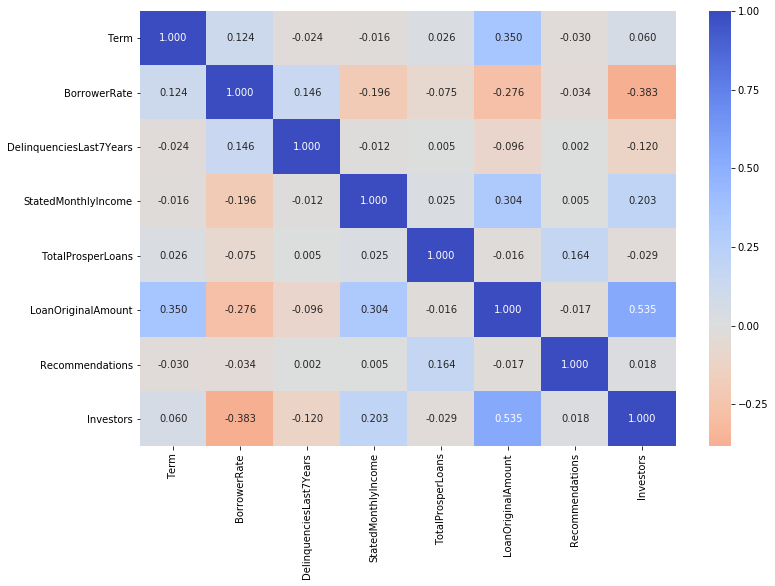

In [43]:
numeric_vars = ['Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
                'TotalProsperLoans', 'LoanOriginalAmount', 'Recommendations', 'Investors'
               ]
plt.figure(figsize = [12, 8])
sb.heatmap(target_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'coolwarm_r', center = 0)
plt.show()

Interestingly there is no strong correlation between variables in this data set. There is some moderate positive correlation between loan amount and term, loan amount and number of investors, loan amount and stated monthly income, recomendations and total prosper loans, number of delinquencies and borrowers rate. There is also moderate negative correlation between loan amount and borrower rate and number of investors and borrower rate. Let's move to the categorial features. 

e:\users\askanio\documents\letscode\udacitydataanalyst\env\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

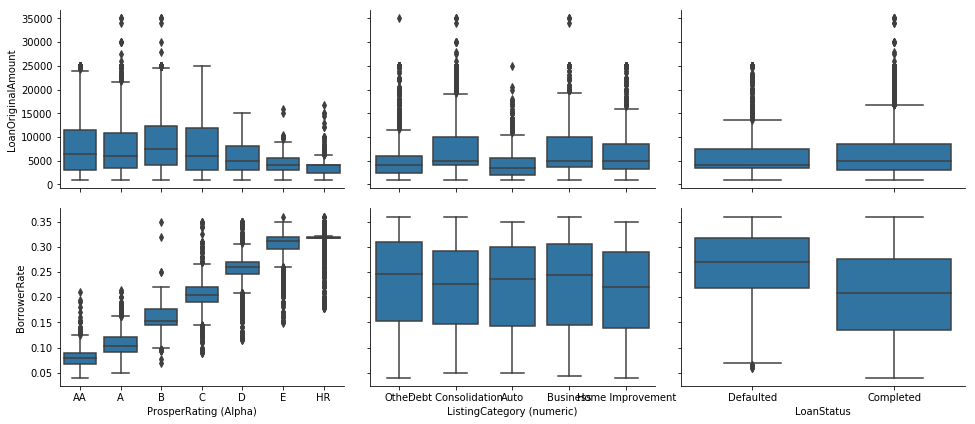

In [44]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerRate']
categoric_vars = ['ProsperRating (Alpha)', 'ListingCategory (numeric)', 'LoanStatus']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = target_df, y_vars = numeric_vars, x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

As expected borrowers with lower rating in general recive lower loan amount and higher interest rate. Sums borrowed for 'other' and 'auto' purposes are ussualy lower than other categories, the rate does not flactuate between various purposes of loans. Defaulted loans tend to be somewhat smaller than completed but this is probably to clients with low rating borrowing less. Borrow rate for defaulted loans is considerably higher than for completed but this is due to clients with lower rating get higher interest rate. Let's check what can influence an outcome of credit:

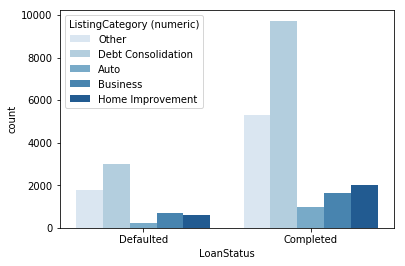

In [45]:
sb.countplot(data=target_df, x='LoanStatus', hue='ListingCategory (numeric)', palette='Blues')

Visually we can see that proportion of defaulted loans is higer for business and home improvement category than for other or debt consolidation category.

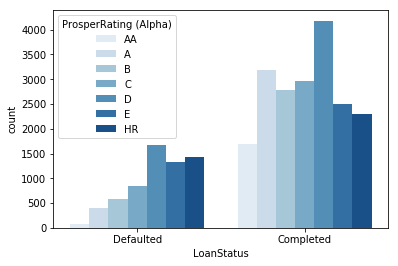

In [46]:
sb.countplot(data=target_df, x='LoanStatus', hue='ProsperRating (Alpha)', palette='Blues')

That is actually quite interesting: The most frequent rating among defaulted loans is actually <b>D</b>, this is contrary to the common logic, most common rating for defaulted debts should be <b>HR</b>.

e:\users\askanio\documents\letscode\udacitydataanalyst\env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


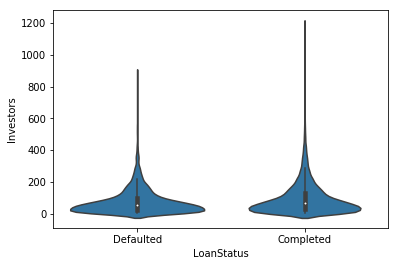

In [47]:
sb.violinplot(data = target_df, x = 'LoanStatus', y = 'Investors', color = default_color)

Defaulted credits usually have less inverstors.

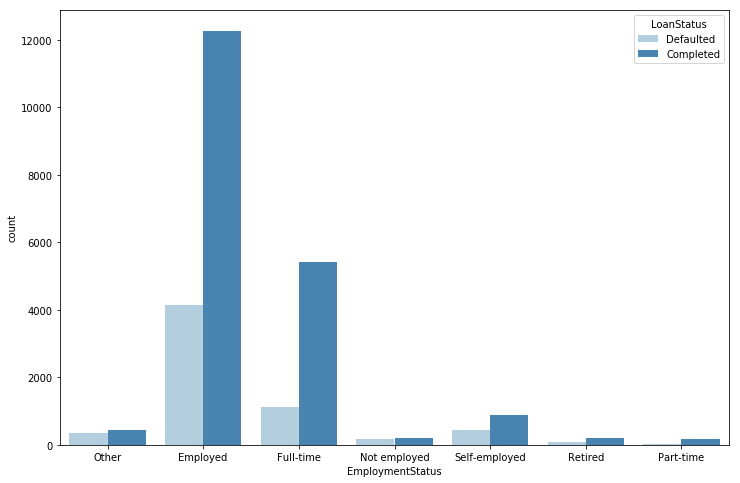

In [125]:
plt.figure(figsize = [12, 8])
sb.countplot(data=target_df, x='EmploymentStatus', hue='LoanStatus', palette='Blues');

Visually it seems that burrowers with emplyoment status 'Not Employed' and 'Self-employed are more likely to default on credit.

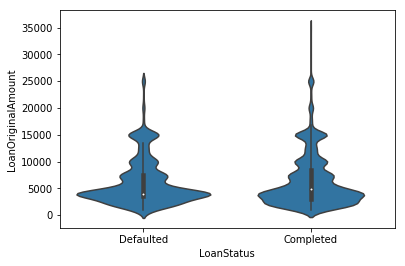

In [49]:
sb.violinplot(data = target_df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = default_color)

Defaulted credits tend to be smaller than completed.

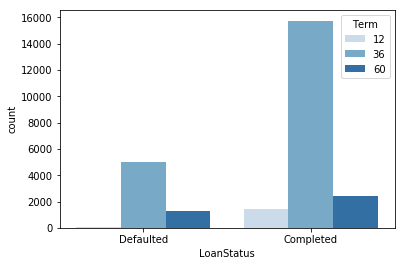

In [50]:
sb.countplot(data=target_df, x='LoanStatus', hue='Term', palette='Blues')

Highest proportion of defaulted credits is among loans with Term of 60 months. Now let's move unto figuring for variables influence Prosper rating of the client.

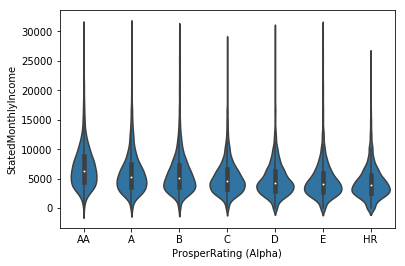

In [51]:
sb.violinplot(data = target_df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', color = default_color)

As expected individuals with higher monthly income tend to have higher rating.

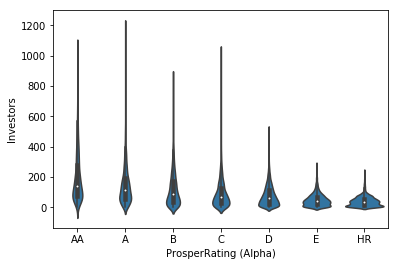

In [52]:
sb.violinplot(data = target_df, x='ProsperRating (Alpha)', y='Investors', color = default_color)

Borrowers with higher ratings on average have more investors.

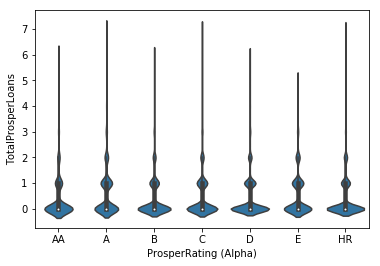

In [53]:
sb.violinplot(data = target_df, x = 'ProsperRating (Alpha)', y = 'TotalProsperLoans', color = default_color)

There is no relation between prosper rating and number of prosper loans.

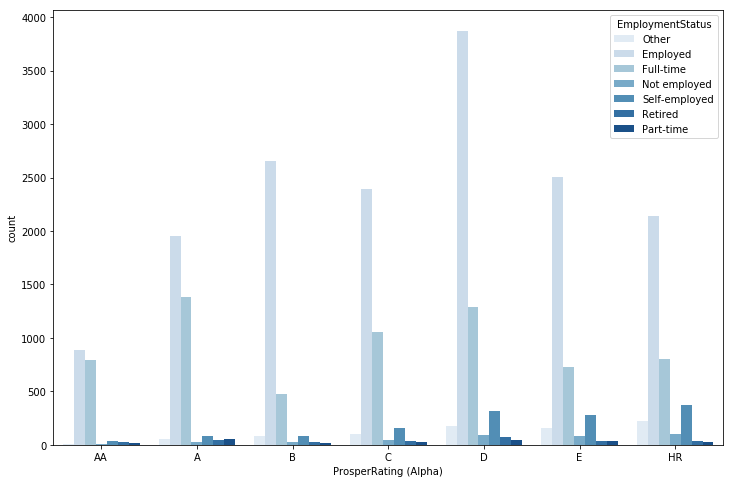

In [54]:
plt.figure(figsize = [12, 8])
sb.countplot(data = target_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette='Blues');

Lower ratings seems to have greater proportions of individuals with employment status Not Employed, Self-emplyoed, Retired and Part-Time.

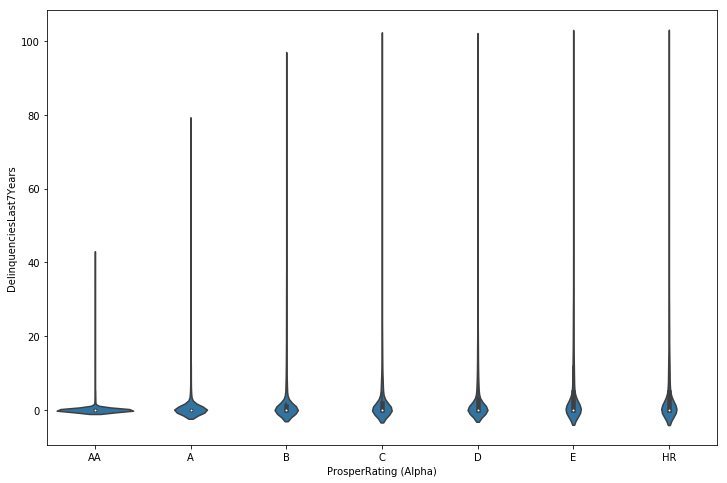

In [55]:
plt.figure(figsize = [12, 8])
sb.violinplot(data = target_df, x = 'ProsperRating (Alpha)', y = 'DelinquenciesLast7Years', color = default_color)

Indivuduals with highest AA rating tend to have less delinquencies than others.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected default credits tend to be given to individuals with lower rating. Business and home improvement seems to be riskier categories. The borrower rate tend to be higher for defaulted credits. Long term (60 months) credits are riskier than short term (12 months). Borrower rate for individuals with low rating is higher. High monthly income corresponds to higher rating. Employment status of idividuals with lower ratings tend to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One interisting thing I've observed is that prosper rating D is the most frequent rating among defaulted credits, probably Prosper need to develop better classification system. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Let's have a closer look on relationship between Term, Rate, Delinquencies, Monthly Income, Loan Amount and LoanStatus.

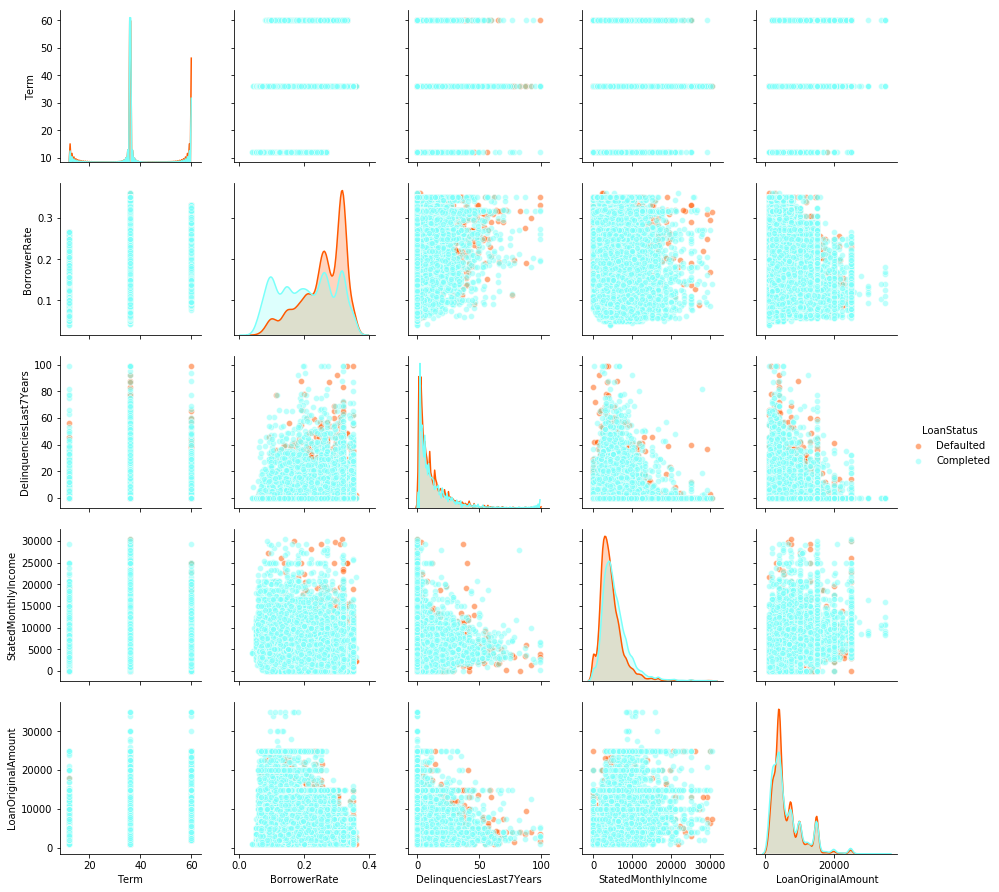

In [95]:
cols = [
    'Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
    'LoanOriginalAmount', 'LoanStatus'
       ]
g = sb.pairplot(target_df[cols], hue='LoanStatus',
                palette={'Defaulted': '#ff5900', 'Completed': '#7afffa'},
                plot_kws={'alpha': 0.5, 'edgecolor': 'white'})
fig = g.fig;

Among numeric variables Number of Delinquencies for last 7 years and Borrower Rate seem to be best predictor for outcome of the credit. Next let's check on categoric variables. But both of them derivatives of credit rating.

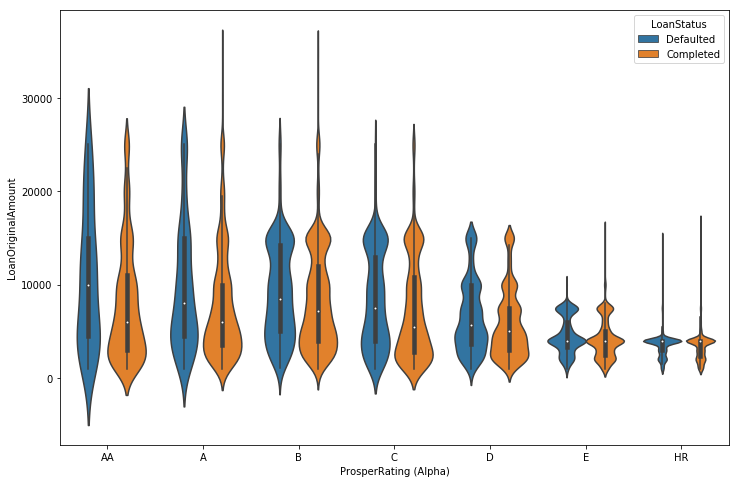

In [98]:
plt.figure(figsize = [12, 8])
sb.violinplot(data=target_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus')

Except for the lowest ratings defaulted credits tend to be larger than completed.

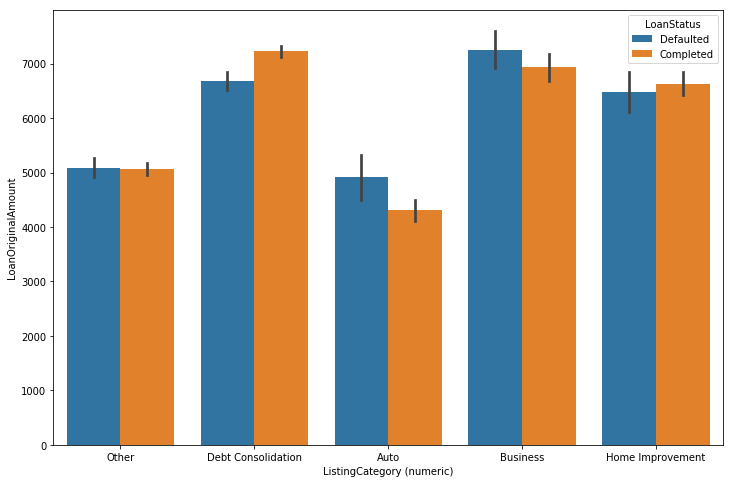

In [102]:
plt.figure(figsize = [12, 8])
sb.barplot(data=target_df, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus')

As we've found before Auto and Business categories are somewhat more prone to the defaulting. Let's have closer look at relationships between credit category, credit rating and outcome of credit.

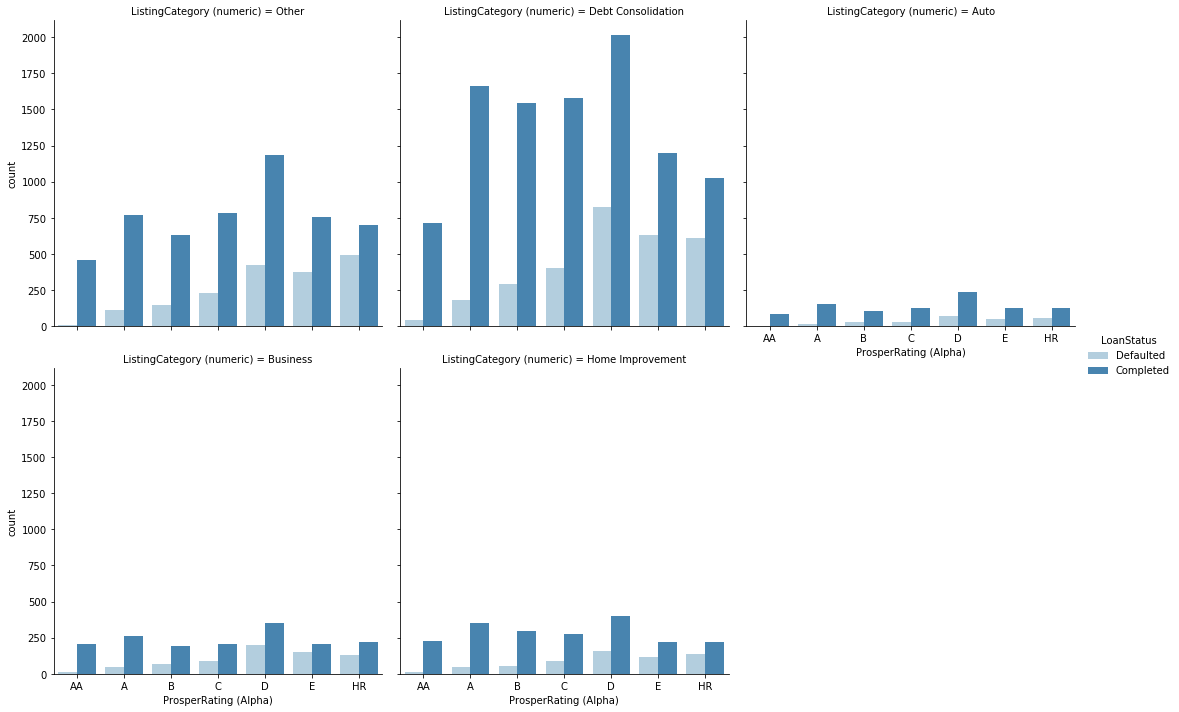

In [112]:
sb.catplot(x='ProsperRating (Alpha)', hue='LoanStatus', col='ListingCategory (numeric)',
              data=target_df, kind='count', palette='Blues', col_wrap=3
             );

It seems there is no substantial difference for default rates in different categories broken up by ratings. Let's check relationship between Term, Category and the outcome:

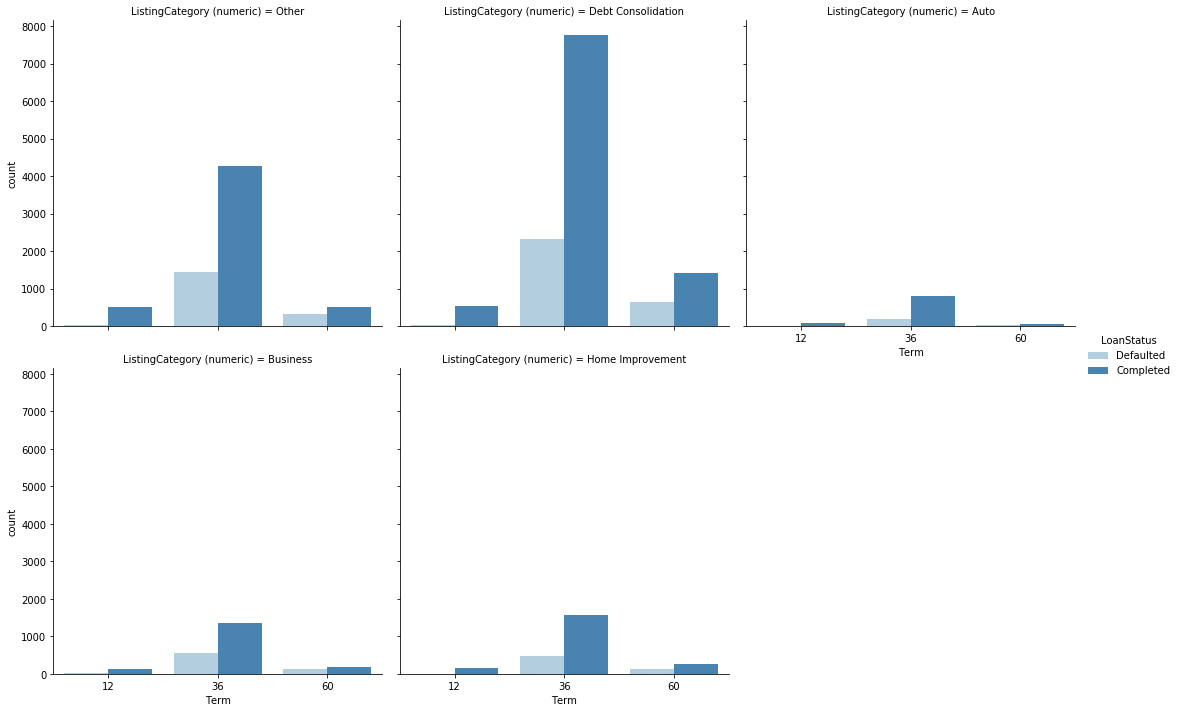

In [114]:
sb.catplot(x='Term', hue='LoanStatus', col='ListingCategory (numeric)',
              data=target_df, kind='count', palette='Blues', col_wrap=3
             );

We can see that long-term credits are especially risky for purposes Other, Business and Home Improvement. Next let's see relationship between Term, Rating and outcome of credit:

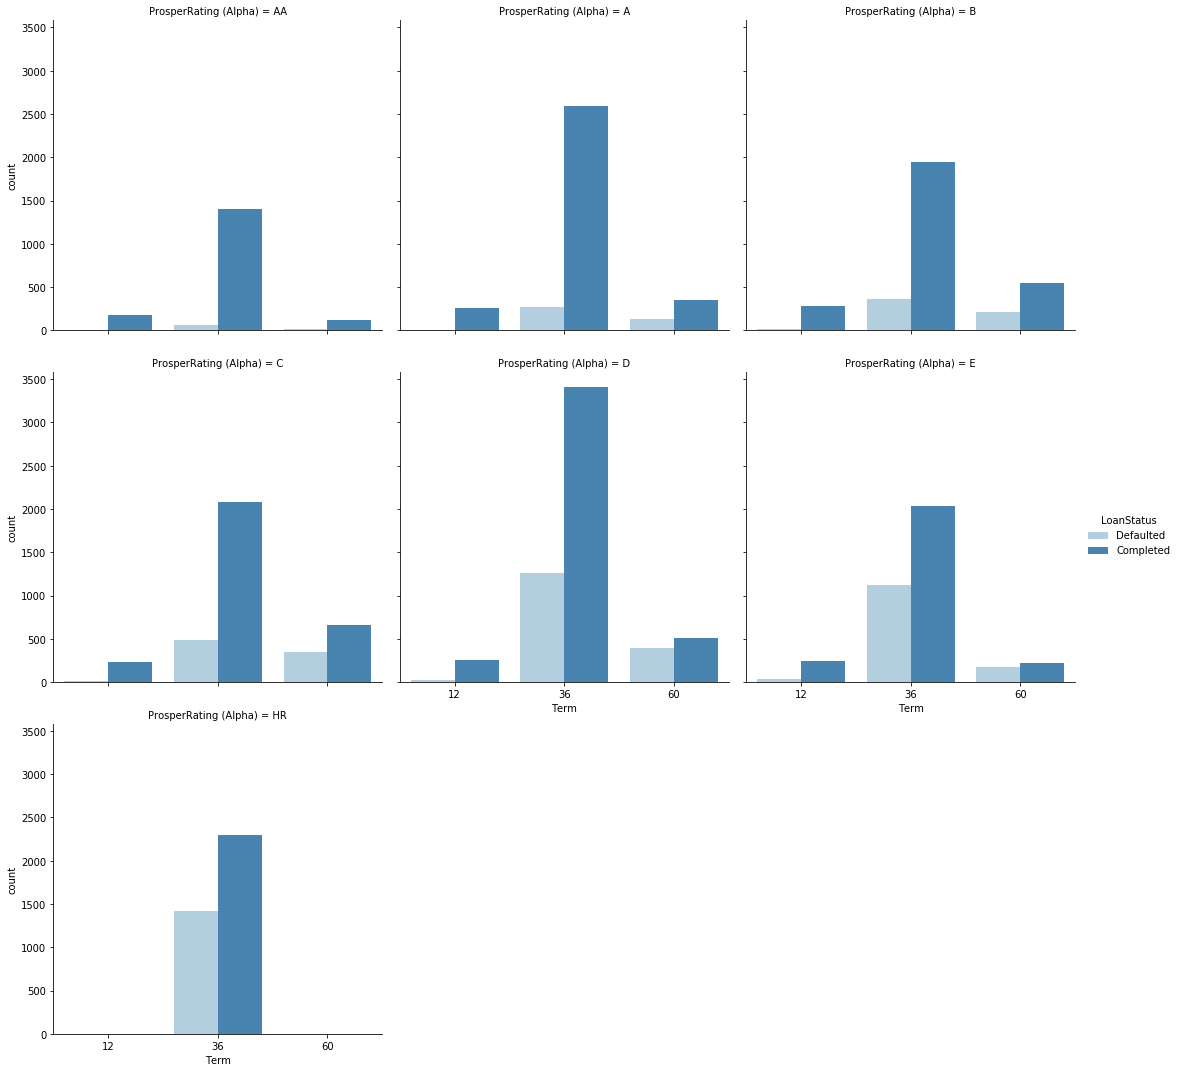

In [115]:
sb.catplot(x='Term', hue='LoanStatus', col='ProsperRating (Alpha)',
              data=target_df, kind='count', palette='Blues', col_wrap=3
             );

Long term (60 months) credit seems to be riskier than mid-term (36 months) or short-term (12 months). Interestingly enough there is no short-term or long-term credits for the lowest credit rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Our initial assumptions were strengthened. The outcome of credit depends on Prosper raing, Term, Employment status. Defaulted credits tend to be larger than completed for all ratings except the lowest ones. In terms of purposes of credits more default prone are auto and business categories. Long term (60 months) loans are riskier than mid-term and short term.

### Were there any interesting or surprising interactions between features?

> Interesting find that individuals with lowerst rating (HR) have only mid-term (36 months) credits.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!